In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [3]:
(x_Train,y_Train), (x_Test,y_Test) = mnist.load_data()

In [4]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [5]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model =Sequential()

In [9]:
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 74s - loss: 0.4907 - acc: 0.8471 - val_loss: 0.0966 - val_acc: 0.9723
Epoch 2/10
 - 74s - loss: 0.1396 - acc: 0.9587 - val_loss: 0.0628 - val_acc: 0.9802
Epoch 3/10
 - 73s - loss: 0.1011 - acc: 0.9700 - val_loss: 0.0504 - val_acc: 0.9842
Epoch 4/10
 - 74s - loss: 0.0834 - acc: 0.9752 - val_loss: 0.0463 - val_acc: 0.9860
Epoch 5/10
 - 74s - loss: 0.0714 - acc: 0.9781 - val_loss: 0.0390 - val_acc: 0.9881
Epoch 6/10
 - 74s - loss: 0.0628 - acc: 0.9815 - val_loss: 0.0389 - val_acc: 0.9884
Epoch 7/10
 - 73s - loss: 0.0554 - acc: 0.9831 - val_loss: 0.0429 - val_acc: 0.9872
Epoch 8/10
 - 73s - loss: 0.0501 - acc: 0.9845 - val_loss: 0.0337 - val_acc: 0.9897
Epoch 9/10
 - 73s - loss: 0.0442 - acc: 0.9869 - val_loss: 0.0339 - val_acc: 0.9906
Epoch 10/10
 - 73s - loss: 0.0413 - acc: 0.9876 - val_loss: 0.0343 - val_acc: 0.9894


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

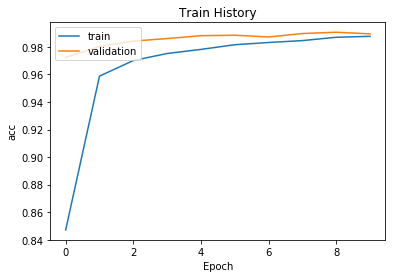

In [23]:
show_train_history(train_history,'acc','val_acc')

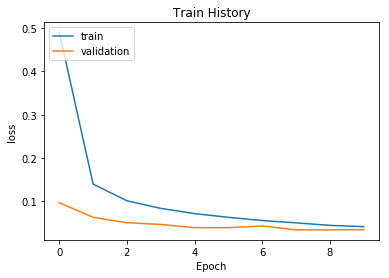

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 8s 810us/step


0.9915

In [29]:
prediction=model.predict_classes(x_Test4D_normalize)

In [30]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [31]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict=" +str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

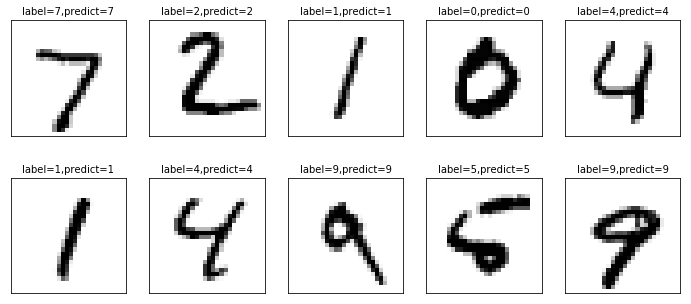

In [33]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [34]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,2,1,0,0
1,0,1131,1,0,0,1,0,1,1,0
2,2,1,1026,0,0,0,0,2,1,0
3,0,0,0,1005,0,1,0,2,2,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,6,0,881,2,0,0,2
6,4,2,0,0,2,1,948,0,1,0
7,0,1,5,1,0,0,0,1019,1,1
8,2,1,2,2,0,0,0,2,961,4
